# 군집화

##1. K-평균 군집화 실행 및 결과 해석

K-평균 군집화를 실행하기 위해 먼저 데이터셋을 생성하고, 원하는 클러스터 개수($K$)를 설정하여 모델을 학습시킵니다.

문제사이킷런의 make_blobs를 사용하여 3개의 명확한 군집을 가지는 데이터셋 X와 정답 레이블 y를 생성하세요. 생성된 데이터 X에 $K=3$으로 K-평균 군집화를 실행하고, 결과를 DataFrame에 저장한 후, 군집별 데이터 개수를 세어 출력하세요.

'##답안##' 부분을 작성하면 됩니다.

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd

# 1. 데이터셋 생성 (3개의 클러스터, 300개의 샘플)
# X: 피처 데이터, y: 정답 레이블
X, y = make_blobs(n_samples=300, n_features=2, centers=3, random_state=0)

In [3]:
# 2. KMeans 모델 객체 생성 및 학습/예측을 한 번에 수행
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
cluster_labels = kmeans.fit_predict(X) # (모델 학습 및 레이블 예측)


In [7]:

# 3. 결과 레이블을 포함한 DataFrame을 만듭니다.
df_result = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df_result['Cluster'] = cluster_labels


In [8]:

# 4. 각 클러스터에 속하는 데이터 포인트의 개수를 세어 출력합니다.
# (힌트: pandas의 value_counts() 함수를 사용하세요.)
cluster_counts = df_result['Cluster'].value_counts()

print("--- K=3 클러스터별 데이터 개수 ---")
print(cluster_counts)

--- K=3 클러스터별 데이터 개수 ---
Cluster
1    105
2    102
0     93
Name: count, dtype: int64


##2. 엘보우 방법으로 최적의 $K$ 찾기
(5점)엘보우(Elbow) 방법은 K를 증가시키며 계산한 이너셔(Inertia) 값의 감소율이 가장 크게 꺾이는 지점($K$)을 최적으로 선택합니다.

문제 1에서 생성한 데이터 X를 사용하여, $K=1$부터 $K=6$까지 클러스터 개수를 변화시키며 이너셔 값을 계산하는 코드를 완성하세요. 출력된 결과를 분석하여 이 데이터셋에 대한 최적의 $K$ 값을 추론하고 그 이유를 설명하세요.

'##답안##'부분을 작성하면 됩니다.


In [10]:
# K=1부터 K=6까지의 이너셔 값을 저장할 리스트
inertia_list = []
k_range = range(1, 7)

# K 값에 따라 KMeans를 수행하고 이너셔를 리스트에 저장
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_) # (이너셔 속성으로 리스트에 추가)

print("--- K 값에 따른 이너셔 변화 ---")
for k, inertia in zip(k_range, inertia_list):
    print(f"K={k}: {inertia:.2f}")


--- K 값에 따른 이너셔 변화 ---
K=1: 1924.55
K=2: 1010.05
K=3: 536.37
K=4: 449.94
K=5: 383.15
K=6: 323.52


위 결과를 바탕으로, 엘보우 법칙에 따라 최적의 K 값이 무엇인지와 그 이유를 설명하세요.

답:

##3. 평균 이동



**3-1. 다음 조건을 만족하도록 빈칸을 채우시오**
- 데이터 생성
  - make_bolbs()를 사용
  - 데이터 생성 시 parameter 설정
    - n_samples=200
    - n_features=2
    - centers=3
    - cluster_std=0.7
    - random_state=156
  - 대역폭은 1로 설정

In [11]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y=make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.7, random_state = 156)

meanshift=MeanShift(bandwidth = 1.0)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3]


**3-2. 최적의 bandwidth를 찾는 함수를 이용해 최적화된 bandwidth값을 적용하시오**

In [12]:
from sklearn.cluster import estimate_bandwidth
import pandas as pd

best_bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(best_bandwidth,3))

clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y

meanshift=MeanShift(bandwidth=best_bandwidth)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

bandwidth 값: 1.905
cluster labels 유형: [0 1 2]


**3-3. '3-2'에서 군집화된 결과를 시각화하시오**

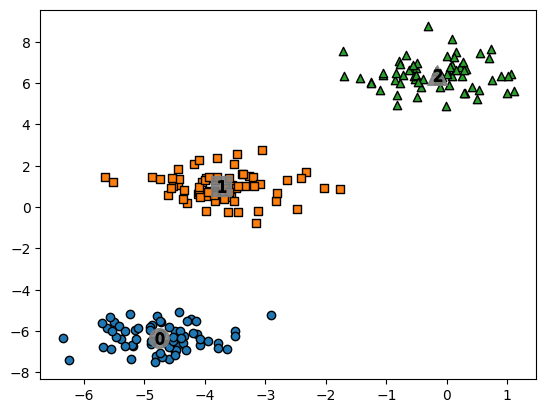

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']=cluster_labels
centers=meanshift.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o','s','^','x','*']

for label in unique_labels:
  label_cluster=clusterDF[clusterDF['meanshift_label']==label]
  center_x_y=centers[label]

  #군집별로 다른 마커로 산점도 적용
  plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolor = 'k', marker = markers[label] )

  #군집별 중심 표현
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='gray',alpha=0.9,marker=markers[label])
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,color='k',edgecolor='k',marker='$%d$'%label)

plt.show()

## 4. GMM(Gaussian Mixture Model)

##4-1. n_components=5으로 하는 GMM 군집화를 실행하시오

In [14]:
#답 작성x 바로 실행
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

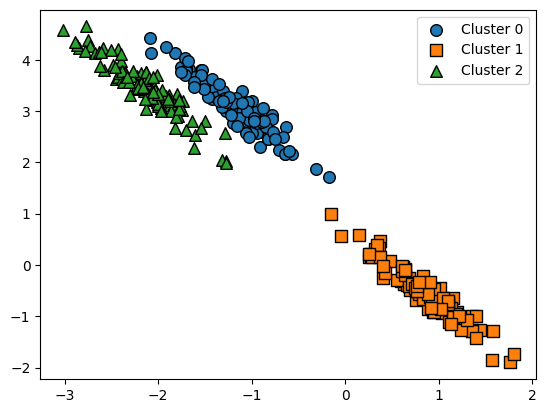

In [15]:
#답 작성x 바로 실행
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#make_bolbs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦
X,y=make_blobs(n_samples=300,n_features=2,centers=3, cluster_std=0.5,random_state=0)

#길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환
transformation =[[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
#feature 데이터 세트와 make_bolbs()의 y결과값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target']=y
#생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None,clusterDF,'target',iscenter=False)

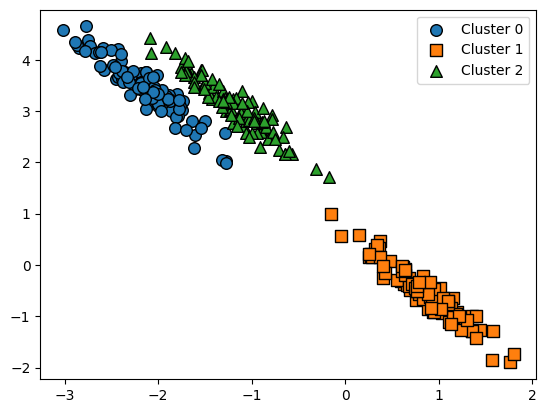

In [16]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] =gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)

## 5. DBSCAN

5-1. DBSCAN의 중요 parameter에 대해 제시하고 간단히 설명하시오


답 :

5-2. core point가 무엇인지에 대해 간단히 설명하시오

답 :

5-3. DBSCAN을 수행하는 코드를 완성하시오(eps=0.3, min_samples=7)

In [17]:
#답 작성x 바로 실행
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

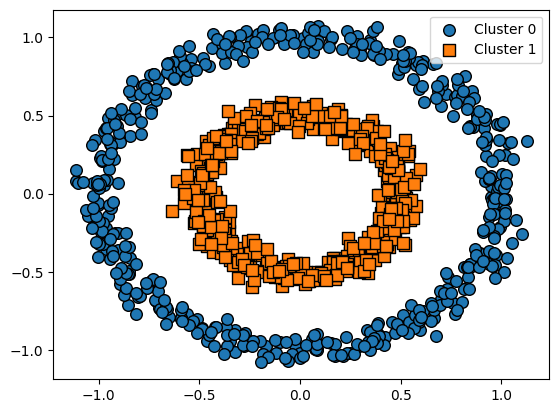

In [18]:
#답 작성x 바로 실행
from sklearn.datasets import make_circles

X,y=make_circles(n_samples=1000,shuffle=True,noise=0.05,random_state=0,factor=0.5)
clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y

visualize_cluster_plot(None,clusterDF,'target',iscenter=False)

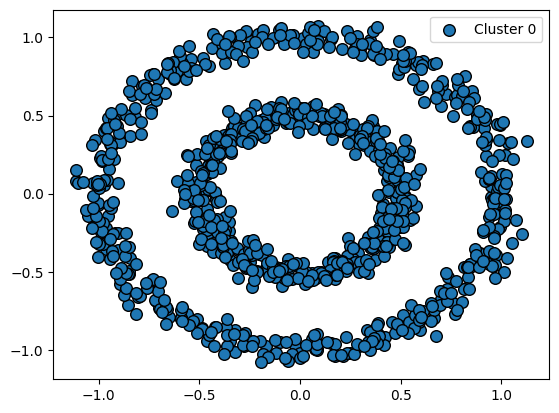

In [19]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행.
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.3, min_samples = 7,metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

# 6. 추가 개념, 고객 세그먼테이션

데이터 셋 다운로드: https://archive.ics.uci.edu/dataset/352/online+retail

In [21]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df=pd.read_excel('Online Retail.xlsx')
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [22]:
# 코드를 실행해주세요
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


 ## Q1. 전처리
   불린 인덱싱을 사용해 Quantity > 0, UnitPrice > 0, CustomerID 가 Not Null인 값만 필터링하는 코드를 작성하시오

In [23]:
# 빈칸을 완성해주세요.

retail_df=retail_df[retail_df['Quantity'] > 0]
retail_df=retail_df[retail_df['UnitPrice'] > 0]
retail_df=retail_df[retail_df['CustomerID'].notnull()]
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [24]:
# 코드를 실행해주세요
retail_df = retail_df[retail_df['Country']=='United Kingdom']
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

## Q2. RFM 기반 데이터 가공

### Q2-1. RFM 기법에 대해 간단히 서술하시오.

* R: ##답안작성##
* F: ##답안작성##
* M: ##답안작성##

### Q2-2. DataFrame의 groupby() 의 multiple 연산을 위해 agg() 이용하는 코드를 작성하시오.

In [25]:
# 빈칸을 완성해주세요.

aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount':'sum'
}

cust_df = retail_df.groupby('CustomerID').agg(aggregations)
cust_df = cust_df.rename(columns = {'InvoiceDate': 'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'
                                    }
                        )
cust_df = cust_df.reset_index()

import datetime as dt
cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_of 로우와 칼럼 건수는 ', cust_df.shape)
cust_df.head(3)

cust_of 로우와 칼럼 건수는  (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


 ## Q3. Agglomerative Clustering (병합 군집)

### Q3-1. Agglomerative Clustering(병합 군집)의 linkage 옵션 4가지에 대해 간단히 서술하시오.
(발표 자료를 참고해서 작성해주시면 됩니다)

* ##답안작성##: ##답안작성##
* ##답안작성##: ##답안작성##
* ##답안작성##: ##답안작성##
* ##답안작성##: ##답안작성##

### Q3-2. `AgglomerativeClustering`를 수행하여 평균 실루엣 계수인 실루엣 스코어를 구하시오

<조건>
* `n_clusters=3`
* `X_features_scaled` 데이터를 `fit_predict`하여 `labels` 생성

In [29]:
# 빈칸을 완성해주세요.
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)
agg_model = AgglomerativeClustering(n_clusters=3)
labels = agg_model.fit_predict(X_features_scaled)
score = silhouette_score(X_features_scaled, labels)
print(f"AgglomerativeClustering (k=3) 실루엣 스코어: {score:.3f}")

AgglomerativeClustering (k=3) 실루엣 스코어: 0.571


시각화를 위한 함수 선언

In [30]:
# 코드를 실행해주세요

import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

def visualize_cluster_results_pca(cluster_lists, X_features):
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])

    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):

        clusterer = AgglomerativeClustering(n_clusters = n_cluster)
        cluster_labels = clusterer.fit_predict(X_features)
        dataframe['cluster'] = cluster_labels

        unique_labels = np.unique(cluster_labels)
        markers=['o', 's', '^', 'x', '*']


        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)

            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,
                             edgecolor='k', marker=markers[label % len(markers)], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))
        axs[ind].legend(loc='upper right')

    plt.show()

C:\Users\A\AppData\Local\Temp\ipykernel_29556\2084991197.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,


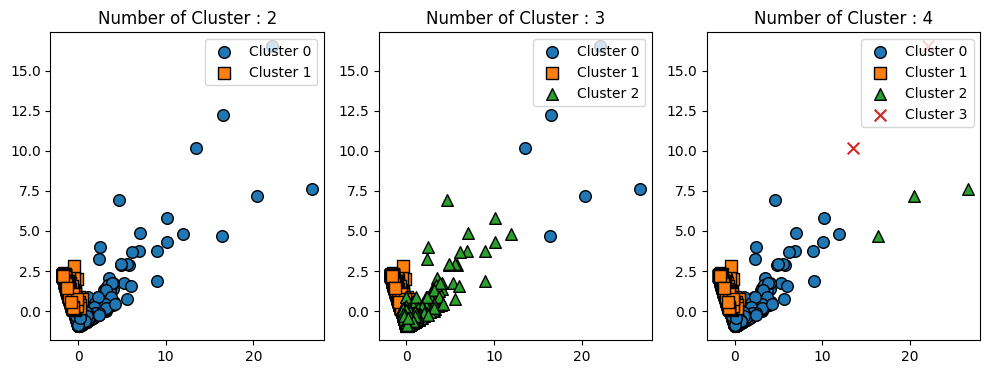

In [33]:
# 코드를 실행해주세요
cluster_k_list = [2, 3, 4]
visualize_cluster_results_pca(cluster_k_list, X_features_scaled)

### Q3-3. 데이터 세트의 왜곡 정도를 낮추기 위해 데이터 변환

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

cust_df['Recency_log']=np.log1p(cust_df['Recency'])
cust_df['Frequency_log']=np.log1p(cust_df['Frequency'])
cust_df['Monetary_log']=np.log1p(cust_df['Monetary'])

X_features = cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_log_scaled = StandardScaler().fit_transform(X_features)

agg_model = AgglomerativeClustering(n_clusters=3)
labels = agg_model.fit_predict(X_features_log_scaled)
score = silhouette_score(X_features_log_scaled, labels)

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_log_scaled,labels)))


실루엣 스코어는 : 0.263


C:\Users\A\AppData\Local\Temp\ipykernel_29556\2084991197.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,


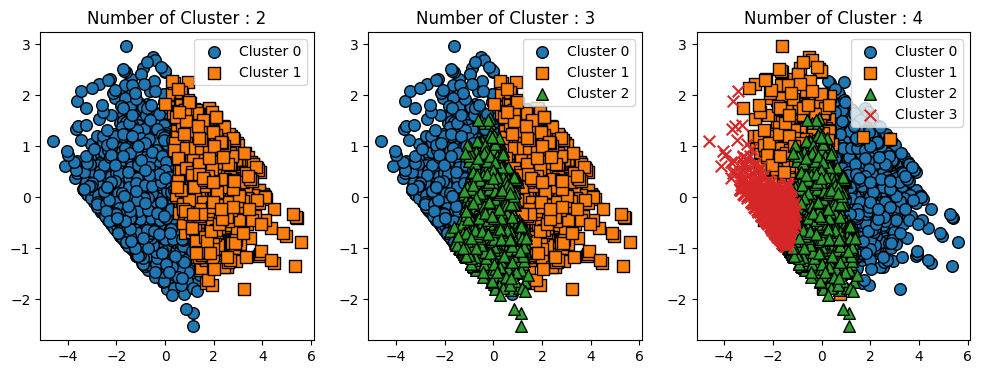

In [38]:
# 코드를 실행해주세요

visualize_cluster_results_pca(cluster_k_list, X_features_log_scaled)